In [3]:
import sys
import os
import numpy as np# type: ignore
from scipy.signal import butter, filtfilt# type: ignore
from statsmodels.tsa.ar_model import AutoReg# type: ignore
from collections import Counter
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QVBoxLayout, QWidget, QLabel, QFileDialog,QHBoxLayout, QMessageBox# type: ignore
from PyQt5.QtCore import QTimer, Qt# type: ignore
from PyQt5 import QtWidgets, QtGui# type: ignore
import pickle
import pywt# type: ignore
from sklearn.preprocessing import LabelEncoder# type: ignore
import matplotlib.pyplot as plt# type: ignore
import warnings

In [4]:
warnings.filterwarnings("ignore")
model_directory = 'saved_models'
label_encoder = LabelEncoder()
label_encoder.fit(['Up', 'Down', 'Left', 'Right', 'Blink'])
categories = ['Up', 'Down', 'Left', 'Right', 'Blink']

#GUI

Signal asagi7
[136. 136. 133. 132. 131. 128. 132. 137. 135. 134. 137. 136. 131. 138.
 133. 130. 134. 137. 133. 135. 135. 133. 133. 136. 140. 132. 137. 140.
 136. 136. 138. 132. 133. 139. 137. 133. 135. 137. 136. 139. 137. 135.
 138. 135. 136. 135. 140. 137. 134. 141. 135. 135. 142. 139. 139. 133.
 141. 137. 137. 140. 137. 134. 139. 139. 135. 135. 134. 126. 119. 119.
 116. 113. 112. 105.  98.  98.  99.  96.  97.  97.  93. 102. 101.  94.
 105. 106. 111. 121. 140. 147. 145. 151. 146. 141. 145. 146. 139. 141.
 141. 144. 140. 145. 143. 141. 147. 149. 142. 144. 149. 142. 145. 147.
 146. 143. 147. 149. 143. 149. 147. 149. 147. 149. 148. 147. 154. 150.
 146. 149. 146. 145. 149. 149. 147. 147. 154. 149. 143. 148. 149. 145.
 154. 151. 145. 147. 151. 147. 144. 151. 146. 146. 151. 147. 145. 145.
 148. 146. 146. 150. 145. 144. 153. 146. 144. 148. 146. 147. 148. 150.
 143. 145. 148. 148. 143. 146. 147. 147. 144. 149. 142. 147. 151. 142.
 143. 147. 145. 145. 146. 146. 143. 142. 149. 144. 143. 146. 14

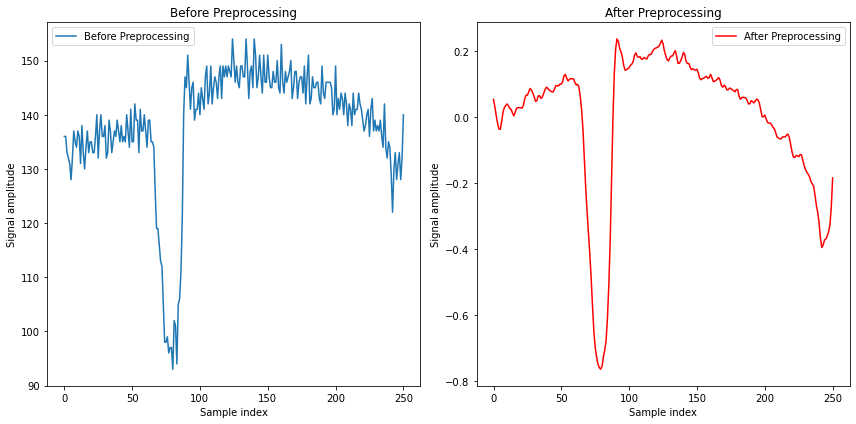

CatBoostClassifier [[1]] ['Down']
DecisionTreeClassifier [1] ['Down']
GradientBoostingClassifier [1] ['Down']
LGBMClassifier [1] ['Down']
OneVsRestClassifier [1] ['Down']
RandomForestClassifier [1] ['Down']
SVC [1] ['Down']
XGBClassifier [1] ['Down']
Accuracy: 100.0
#################################################################
Signal kirp16
[141. 136. 142. 142. 132. 139. 144. 136. 137. 143. 139. 137. 140. 142.
 133. 140. 143. 134. 140. 145. 139. 135. 142. 142. 135. 142. 141. 135.
 139. 145. 136. 136. 144. 142. 134. 142. 143. 137. 141. 142. 139. 138.
 142. 141. 135. 142. 144. 134. 141. 144. 139. 138. 143. 141. 135. 142.
 143. 135. 142. 140. 137. 138. 141. 139. 134. 139. 142. 132. 139. 141.
 134. 137. 143. 139. 134. 143. 141. 134. 141. 141. 133. 136. 145. 138.
 138. 147. 154. 160. 178. 182. 175. 173. 171. 161. 155. 160. 153. 141.
 151. 149. 141. 144. 149. 140. 136. 148. 143. 137. 144. 142. 134. 141.
 142. 135. 139. 142. 138. 132. 141. 139. 132. 139. 139. 133. 134. 139.
 135. 128. 140

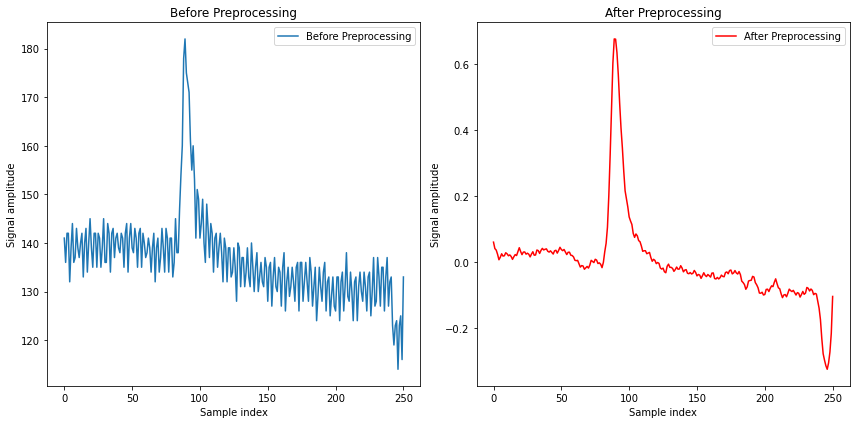

CatBoostClassifier [[0]] ['Blink']
DecisionTreeClassifier [0] ['Blink']
GradientBoostingClassifier [0] ['Blink']
LGBMClassifier [0] ['Blink']
OneVsRestClassifier [0] ['Blink']
RandomForestClassifier [0] ['Blink']
SVC [0] ['Blink']
XGBClassifier [0] ['Blink']
Accuracy: 100.0
#################################################################
Signal sag11
[129. 133. 131. 135. 136. 141. 131. 133. 134. 133. 133. 140. 127. 132.
 139. 133. 132. 138. 135. 135. 137. 137. 132. 133. 139. 135. 133. 137.
 137. 137. 133. 138. 133. 133. 145. 136. 138. 139. 128. 134. 136. 136.
 136. 135. 137. 142. 135. 133. 132. 137. 134. 145. 150. 158. 172. 171.
 176. 184. 193. 193. 197. 194. 204. 198. 191. 188. 190. 183. 183. 177.
 165. 149. 146. 133. 135. 131. 132. 136. 135. 127. 130. 139. 131. 129.
 132. 127. 131. 131. 128. 118. 126. 120. 125. 120. 118. 123. 117. 119.
 125. 114. 117. 121. 113. 113. 124. 114. 118. 124. 116. 116. 120. 114.
 108. 121. 116. 120. 123. 116. 115. 116. 113. 113. 112. 111. 113. 119.
 112. 1

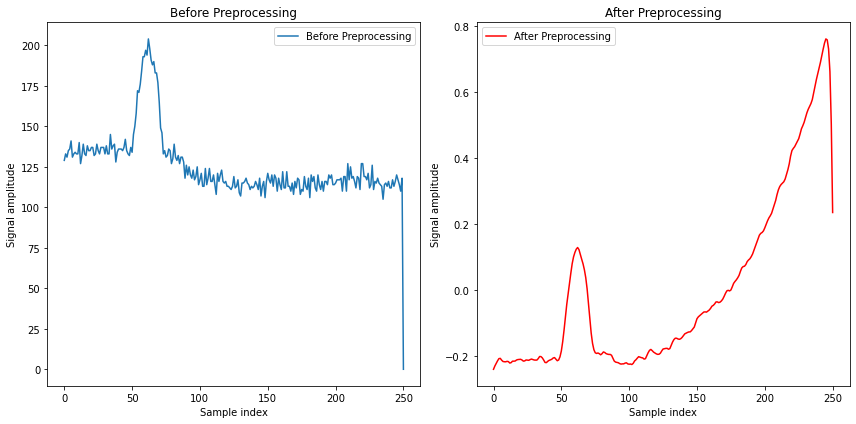

CatBoostClassifier [[3]] ['Right']
DecisionTreeClassifier [3] ['Right']
GradientBoostingClassifier [3] ['Right']
LGBMClassifier [3] ['Right']
OneVsRestClassifier [3] ['Right']
RandomForestClassifier [3] ['Right']
SVC [4] ['Up']
XGBClassifier [3] ['Right']
Accuracy: 87.5
#################################################################
Signal sol13
[125. 126. 121. 125. 120. 121. 120. 123. 121. 116. 122. 124. 113. 119.
 120. 121. 115. 126. 124. 116. 125. 125. 117. 122. 128. 122. 120. 125.
 123. 118. 125. 125. 120. 123. 129. 122. 121. 127. 126. 121. 127. 124.
 121. 120. 123. 120. 125. 127. 124. 118. 125. 127. 120. 129. 125. 119.
 122. 122. 124. 120. 127. 124. 124. 130. 122. 126. 122. 125. 120. 127.
 125. 123. 123. 129. 123. 122. 124. 123. 122. 122. 121. 130. 120. 125.
 129. 122. 122. 124. 126. 126. 120. 111.  98.  93.  90.  79.  76.  71.
  71.  70.  72.  73.  67.  71.  73.  79.  71.  76.  72.  74.  70.  77.
  74.  92.  92. 113. 118. 131. 134. 139. 140. 139. 142. 144. 138. 141.
 143. 140. 

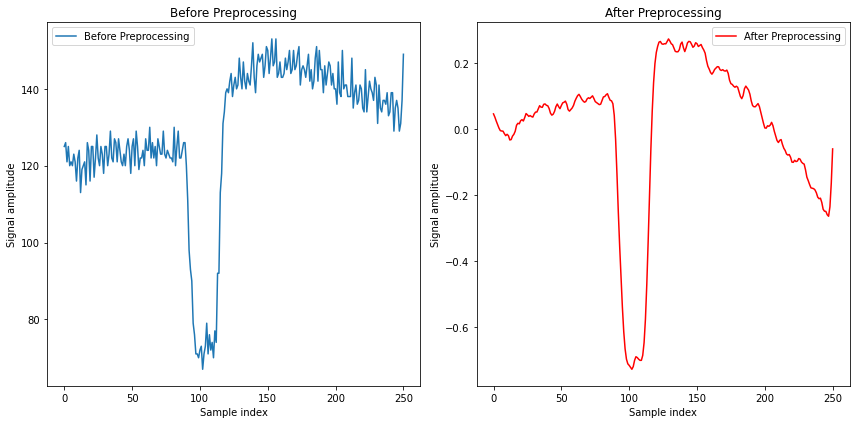

CatBoostClassifier [[2]] ['Left']
DecisionTreeClassifier [2] ['Left']
GradientBoostingClassifier [2] ['Left']
LGBMClassifier [2] ['Left']
OneVsRestClassifier [2] ['Left']
RandomForestClassifier [2] ['Left']
SVC [2] ['Left']
XGBClassifier [2] ['Left']
Accuracy: 100.0
#################################################################
Signal yukari1
[151. 145. 146. 151. 151. 148. 151. 152. 147. 152. 154. 148. 147. 151.
 146. 146. 147. 147. 146. 149. 150. 145. 146. 147. 145. 144. 148. 148.
 143. 145. 147. 144. 146. 148. 145. 146. 151. 147. 144. 146. 145. 144.
 145. 149. 143. 147. 146. 144. 143. 145. 146. 142. 145. 146. 143. 144.
 149. 141. 141. 144. 143. 142. 145. 146. 139. 144. 142. 134. 140. 146.
 144. 143. 143. 146. 138. 142. 144. 141. 141. 145. 141. 144. 143. 143.
 147. 157. 167. 168. 176. 182. 179. 182. 186. 181. 184. 185. 184. 181.
 182. 181. 176. 179. 183. 179. 177. 181. 173. 160. 152. 141. 131. 129.
 128. 125. 124. 126. 123. 125. 125. 126. 120. 122. 125. 121. 124. 122.
 121. 125. 12

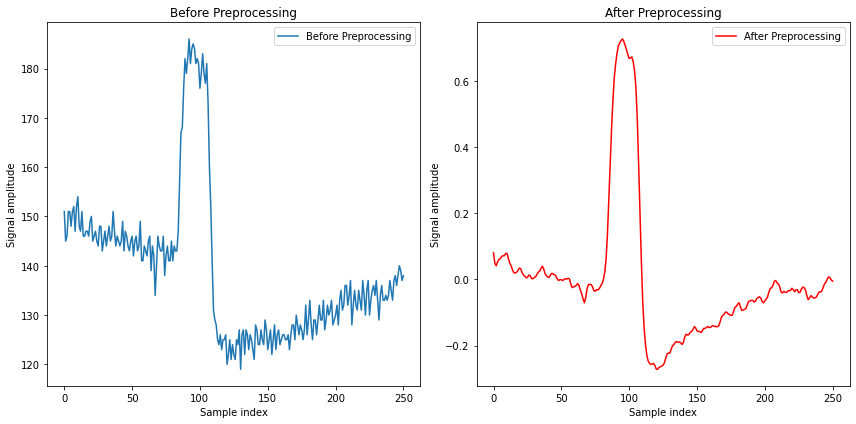

CatBoostClassifier [[4]] ['Up']
DecisionTreeClassifier [4] ['Up']
GradientBoostingClassifier [4] ['Up']
LGBMClassifier [4] ['Up']
OneVsRestClassifier [4] ['Up']
RandomForestClassifier [4] ['Up']
SVC [4] ['Up']
XGBClassifier [4] ['Up']
Accuracy: 100.0
#################################################################


SystemExit: 0

In [9]:
class PredictionGUI(QMainWindow):
    def __init__(self):
        super().__init__()
        self.models = None
        self.files_queue = []
        self.current_file_index = 0
        if not self.loadModels():
            sys.exit()
        self.initUI()

    def loadModels(self):
        try:
            self.models = self.load_models()
            return True
        except Exception as e:
            QMessageBox.critical(self, "Model Loading Error", f"Error loading models: {e}")
            return False

    def initUI(self):
        self.setWindowTitle("EOG Based Arrows Interface")
        self.setGeometry(100, 100, 800, 500)
        image_label = QtWidgets.QLabel(self)
        pixmap = QtGui.QPixmap("download.png")
        image_label.setPixmap(pixmap)
        image_label.setGeometry(200, 50, self.width(), self.height())

        self.central_widget = QWidget(self)
        self.setCentralWidget(self.central_widget)
        self.main_layout = QVBoxLayout(self.central_widget)

        self.loadButton = QPushButton('Load Test Senario ')
        self.loadButton.clicked.connect(self.loadFolder)
        self.main_layout.addWidget(self.loadButton)

        self.nextButton = QPushButton('Next Signal')
        self.nextButton.clicked.connect(self.loadNextFile)
        self.nextButton.setEnabled(False)  # Enable only after files are loaded
        self.main_layout.addWidget(self.nextButton)

        self.predictAgainButton = QPushButton('Predict Again')
        self.predictAgainButton.clicked.connect(self.predictAgain)
        self.predictAgainButton.setEnabled(False)
        self.main_layout.addWidget(self.predictAgainButton)

        self.predictionLabel = QLabel('No prediction yet')
        self.predictionLabel.setAlignment(Qt.AlignCenter)
        self.predictionLabel.setStyleSheet("font-size: 16pt; font-weight: bold; color: blue;")
        self.main_layout.addWidget(self.predictionLabel)

        self.arrows_layout = QHBoxLayout()
        self.arrows = {'Up': QLabel('↑'), 'Down': QLabel('↓'), 'Left': QLabel('←'), 'Right': QLabel('→')}
        for label in self.arrows.values():
            label.setAlignment(Qt.AlignCenter)
            label.setStyleSheet("font-size: 24pt; font-weight: bold; color: red;")
            self.arrows_layout.addWidget(label)
        self.main_layout.addLayout(self.arrows_layout)

        self.timer = QTimer(self)
        self.timer.timeout.connect(self.toggleArrowVisibility)
        self.flash_duration = 500
        self.flash_count = 0
        self.max_flashes = 10
        self.arrow_visible = True

    def loadFolder(self):
        folderPath = QFileDialog.getExistingDirectory(self, "Select Folder")
        if folderPath:
            self.files_queue = [os.path.join(folderPath, f) for f in os.listdir(folderPath) if f.endswith('.txt')]
            self.current_file_index = 0
            self.loadNextFile()
            self.nextButton.setEnabled(True)

    @staticmethod
    def load_models():
        models = {}
        for model_file in os.listdir(model_directory):
            if model_file.endswith('.pkl'):
                path = os.path.join(model_directory, model_file)
                with open(path, 'rb') as file:
                    model_name = model_file.replace('_model.pkl', '').replace('_', ' ')
                    models[model_name] = pickle.load(file)
        return models

    def loadNextFile(self):
        if self.current_file_index < len(self.files_queue):
            fileName = self.files_queue[self.current_file_index]
            self.predictAgainButton.setEnabled(True)
            self.runPrediction(fileName)
            self.current_file_index += 1
        else:
            QMessageBox.information(self, "Queue Complete", "All files have been processed.")
            self.current_file_index = 0
            self.nextButton.setEnabled(False)

    @staticmethod
    def Preprocessing(signal, order=2):
        nyq = 0.5 * 176
        low = 0.5 / nyq
        high = 20 / nyq
        b, a = butter(order, [low, high], btype='band', analog=False)
        band_filtered_data = filtfilt(b, a, signal)
        normalized_signal = (band_filtered_data - np.min(band_filtered_data)) / (
                np.max(band_filtered_data) - np.min(band_filtered_data))
        dc_removed_signal = normalized_signal - np.mean(normalized_signal)
        return dc_removed_signal

    @staticmethod
    def Feature_Extraction_with_DWT(signal, wavelet='db4', level=5):
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        features = []
        for coeff in coeffs:
            features.extend([np.mean(coeff), np.std(coeff), np.var(coeff), np.sum(np.square(coeff))])
        return features

    def predictAgain(self):
        if self.last_loaded_file:
            self.runPrediction(self.last_loaded_file)

    def runPrediction(self, file_path):
        try:
            predicted_class = self.predict_most_common_class(file_path, self.models, label_encoder)
            self.predictionLabel.setText(f"Predicted Movement: {predicted_class}")
            self.startFlashing(predicted_class)
        except Exception as e:
            QMessageBox.critical(self, "Prediction Error", f"Error during prediction: {e}")
            self.predictionLabel.setText("Prediction failed!")

    @staticmethod
    def plot_data(data_before, data_after):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(data_before, label='Before Preprocessing')
        plt.title('Before Preprocessing')
        plt.xlabel('Sample index')
        plt.ylabel('Signal amplitude')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(data_after, label='After Preprocessing', color='r')
        plt.title('After Preprocessing')
        plt.xlabel('Sample index')
        plt.ylabel('Signal amplitude')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def startFlashing(self, direction):
        self.timer.stop()
        for arrow in self.arrows.values():
            arrow.setVisible(False)
        self.flash_count = 0
        self.current_arrow = self.arrows.get(direction)
        if self.current_arrow:
            self.arrow_visible = True
            self.current_arrow.setVisible(self.arrow_visible)
            self.timer.start(self.flash_duration)

    def predict_most_common_class(self, file_path, models, label_encoder):
        try:
            signal = np.loadtxt(file_path)
            print("Signal",os.path.splitext(os.path.basename(file_path))[0])
            print(signal)
            processed_signal = self.Preprocessing(signal, 1)
            print("Processed Signal")
            print(processed_signal)
            #processed_signal_file = os.path.splitext(file_path)[0] + "_processed.txt"
            #np.savetxt(processed_signal_file, processed_signal)
            features = self.Feature_Extraction_with_DWT(processed_signal)
            print("Features")
            print(features)
            #features_signal_file = os.path.splitext(file_path)[0] + "_features.txt"
            #np.savetxt(features_signal_file, features)
            features_array = np.array(features).reshape(1, -1)
            self.plot_data(signal, processed_signal)

        except Exception as e:
            return f"Error processing {file_path}: {e}"

        predictions = []
        index=[]
        for name, model in models.items():
            predicted_label_index = model.predict(features_array)
            predicted_label = label_encoder.inverse_transform(predicted_label_index)
            index.append(list(predicted_label))
            predictions.append(predicted_label[0])
            print(model.__class__.__name__, predicted_label_index, predicted_label)
        most_common = Counter(predictions).most_common(1)
        accuracy = most_common[0][1] / len(predictions)
        print("Accuracy:", accuracy * 100)
        print("#################################################################")
        return most_common[0][0]

    def toggleArrowVisibility(self):
        if self.current_arrow:
            self.arrow_visible = not self.arrow_visible
            self.current_arrow.setVisible(self.arrow_visible)
        self.flash_count += 1
        if self.flash_count >= self.max_flashes:
            self.timer.stop()
            if self.current_arrow:
                self.current_arrow.setVisible(True)


def main():
    app = QApplication(sys.argv)
    gui = PredictionGUI()
    if gui.models:
        gui.show()
        sys.exit(app.exec_())


if __name__ == '__main__':
    main()